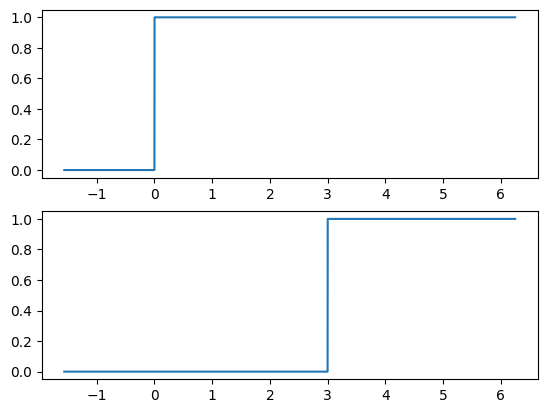

In [125]:
import matplotlib.pyplot as plt
import math

def sin_series_gen(freq,amplitude,dt,t_series):
    return [math.sin((dt * freq * 2 * math.pi * amplitude) * t_series[i] / dt) for i in range(len(t_series))]

def unit_step_series_gen(t0,dt,t_series):
    return [1 if t_series[i] >= -t0 else 0 for i in range(len(t_series))]

def time_series_gen(duration):
    dt = duration / 10000 * 1.25
    series = [dt * i for i in range(-2500,10000,1)]
    return dt,series

def sum_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempSum = 0
    sum : list = []
    for index in range(argLen):
        for argIndex in range(len(args)):
            tempSum += args[argIndex][index]
            # print(tempSum)
        sum.append(tempSum * ((1 / len(args)) if scale_down == True else 1))
        tempSum = 0
    return sum

def sub_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempSub = 0
    sub : list = []
    for index in range(argLen):
        for argIndex in range(len(args)):
            tempSub -= args[argIndex][index]
            # print(tempSub)
        sub.append(tempSub * ((1 / len(args)) if scale_down == True else 1))
        tempSub = 0
    return sub

def multi_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempMulti = 1
    sum : list = []
    for index in range(argLen):
        for argIndex in range(len(args)):
            tempMulti *= args[argIndex][index] 
        sum.append(tempMulti * ((1 / len(args)) if (scale_down == True) else 1))
        tempMulti = 1
    return sum
        

dt, t_series = time_series_gen(5)
sin_series_1 = sin_series_gen(0.5,1,dt,t_series)
sin_series_5 = sin_series_gen(5,0.5,dt,t_series)
sin_series_10 = sin_series_gen(10,0.2,dt,t_series)
sin_sum = sum_series(sin_series_1,sin_series_5,sin_series_10)

step1 = unit_step_series_gen(0,dt,t_series)
step2 = unit_step_series_gen(-3,dt,t_series)
step_sub = sub_series(step1,step2,scale_down=False)

fig,ax = plt.subplots(2)
# ax.plot(t_series,step_sub)
ax[0].plot(t_series,step1)
ax[1].plot(t_series,step2)